In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from datetime import date, timedelta
import numpy as np

In [48]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 6)

In [16]:
repos_path = "C:/Users/MANOJ/the-building-data-genome-project/"

In [6]:
temp = pd.read_csv(os.path.join(repos_path,"data/raw/temp_open_utc.csv"), index_col="timestamp", parse_dates=True)

In [7]:
meta = pd.read_csv(os.path.join(repos_path,"data/raw/meta_open.csv"), index_col='uid', parse_dates=["datastart","dataend"], dayfirst=True)

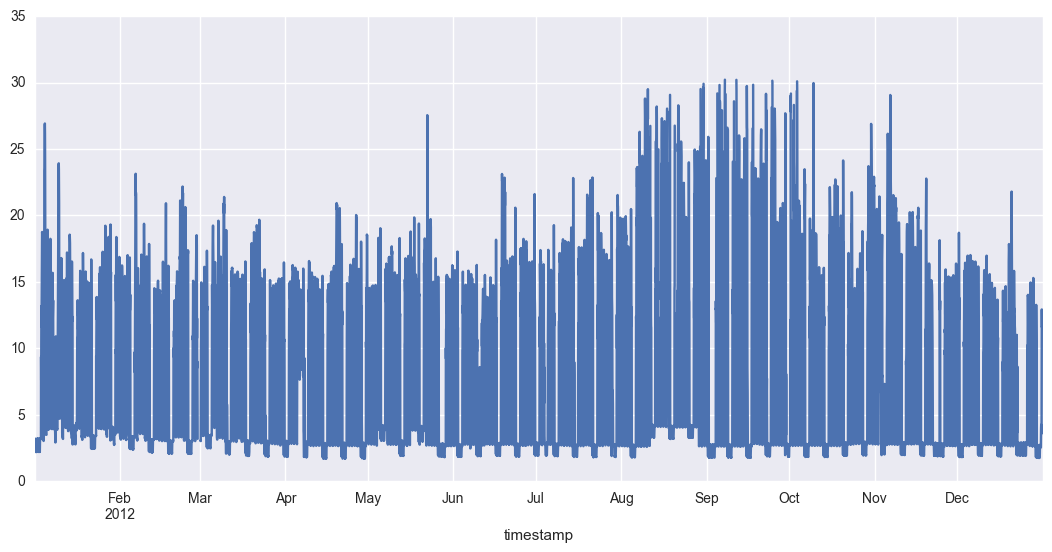

In [49]:
temp['Office_Elizabeth'][meta.ix['Office_Elizabeth']['datastart']:meta.ix['Office_Elizabeth']['dataend']].plot()

In [10]:
weather = pd.read_csv(os.path.join(repos_path,"data/external/weather/weather22.csv"),index_col="timestamp", parse_dates=True)

In [35]:
start_date = '2012-02-01'
end_date = '2012-02-03'

In [36]:
temperature = weather[['TemperatureC']].resample('H').mean()
temperature = temperature[start_date:end_date]

In [37]:
office = temp[['Office_Elizabeth']][start_date:end_date]

Function for normalize

In [40]:
def normalize(df):
    return (df-df.min())/(df.max()-df.min())

In [41]:
frame = normalize(office.join(temperature))

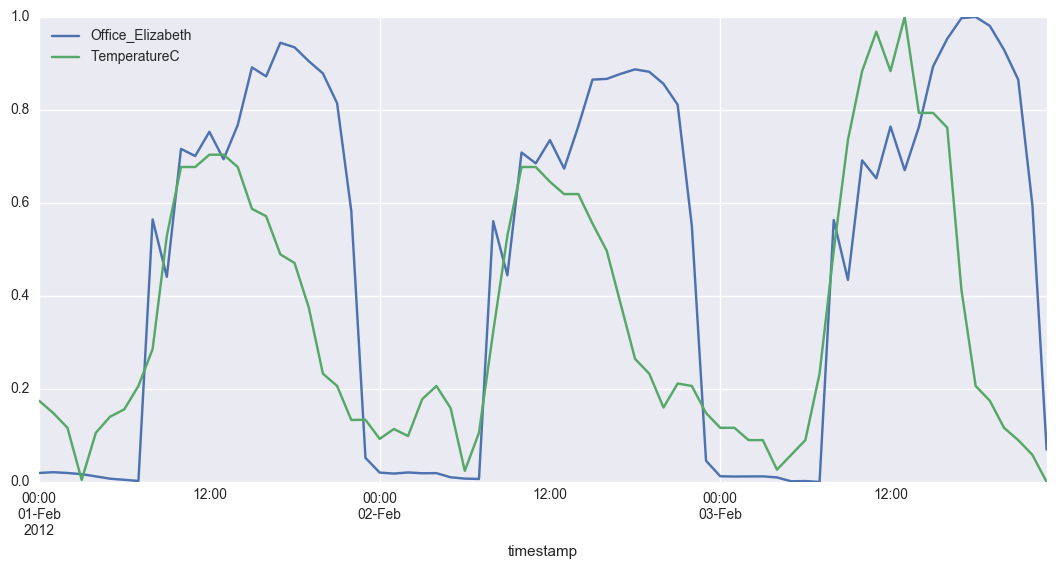

In [50]:
frame.plot()